<a href="https://colab.research.google.com/github/champsleague/Machine-Learning-Projects/blob/main/ML_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
myfile = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# reading data from the csv
df = pd.read_csv('train.csv')
df


# plotting the original values
x = df['movie'].tolist()
# x = df['drama'].tolist()
y = df['profits'].tolist()
plt.scatter(x, y)

# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = df['movie'].max()
min_x = df['movie'].min()

# max_x = df['drama'].max()
# min_x = df['drama'].min()

# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)

# the substituted equation
y = 1.0143 * x - 0.4618

# plotting the regression line
plt.plot(y, 'r')
plt.show()


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
x5 = df.drop(['profits'], axis=1)
y = df['profits'].values.reshape(-1,1)
lin_reg = LinearRegression()
MSE5 = cross_val_score(lin_reg, x5, y, 
scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSE5)
print('MSE : ',mean_MSE)

print('\n\n')

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x5, y)

# find the best parameter and the best MSE
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

print('\n\n')


from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 
1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x5, y)

# find the best parameter and the best MSE
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


   movie     drama    profits
0     77  0.161247  79.775152
1     21  0.007796  23.177279
2     22  0.519576  25.609262
3     20  0.526134  17.857388
4     36  0.580629  41.849864 


Train data shape of X = (225, 2) and Y = (225,) : 
Test data shape of X = (75, 2) and Y = (75,) : 


Mean squared Error on test set :  8.566108921538149


  Columns  Coefficient Estimate
0   movie              1.015919
1   drama             -0.253564


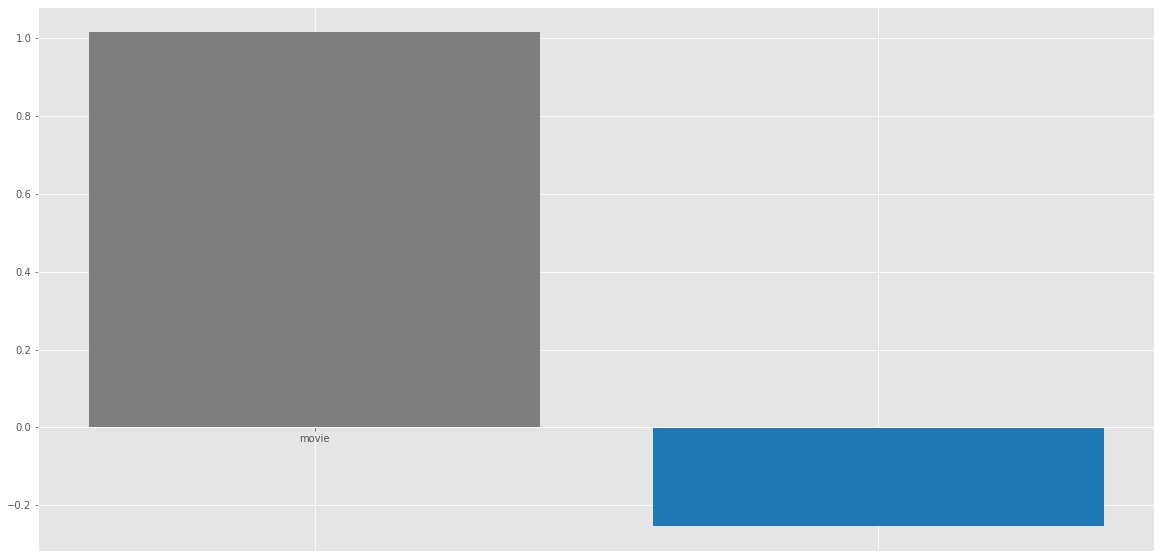

Mean Squared Error on test set 8.573855177015085


,Columns,Coefficient Estimate
0,movie,1.014605
1,drama,-0.000000


In [75]:
# import model
from sklearn.linear_model import ElasticNet

# reading data from the csv
df = pd.read_csv('train.csv')
df

# input
X = df.iloc[:, :-1]
 
#output
Y = df.iloc[:, -1]
print(df.head(),'\n\n')

#  apply train-test split to divide the dataset into two parts (test_size 25%)
x_train, x_test, y_train, y_test = train_test_split(
	df.iloc[:, :-1], df.iloc[:, -1],
	test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(x_train.shape, y_train.shape))
print("Test data shape of X = % s and Y = % s : "%(	x_test.shape, y_test.shape))

print("\n")

# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

print("\n")

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)


# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff
